In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("C:/Users/jaked/OneDrive/DSC680")

In [4]:
df = pd.read_csv('american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [5]:
# Let's start with updating the column names from X1, X2, etc. to their actual representations. Column names derived from data card

rename_dict = {
    'X1': 'current_assets',
    'X2': 'cost_of_goods_sold',
    'X3': 'depreciation_amortization',
    'X4': 'ebitda',
    'X5': 'inventory',
    'X6': 'net_income',
    'X7': 'total_receivables',
    'X8': 'market_value',
    'X9': 'net_sales',
    'X10': 'total_assets',
    'X11': 'total_long_term_debt',
    'X12': 'ebit',
    'X13': 'gross_profit',
    'X14': 'total_current_liabilities',
    'X15': 'retained_earnings',
    'X16': 'total_revenue',
    'X17': 'total_liabilities',
    'X18': 'total_operating_expenses'
}

df.rename(columns=rename_dict, inplace=True)
print(df.columns.tolist())

['company_name', 'status_label', 'year', 'current_assets', 'cost_of_goods_sold', 'depreciation_amortization', 'ebitda', 'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales', 'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit', 'total_current_liabilities', 'retained_earnings', 'total_revenue', 'total_liabilities', 'total_operating_expenses']


In [6]:
# I noticed that the instances of 'failed' companies in the target variable status_label has all years for which there is data for that company listed as failed.
# I'm pretty sure only the last year in which the company has data available should be listed as failed with all the prior years as alive. So let's fix that now

def fix_status(group):
    # Find the last year for this company
    max_year = group['year'].max()
    # If the company has any 'failed' record:
    if 'failed' in group['status_label'].values:
        # Set all years except the final one to 'alive'
        group.loc[group['year'] < max_year, 'status_label'] = 'alive'
        # Ensure the final year is labeled as 'failed'
        group.loc[group['year'] == max_year, 'status_label'] = 'failed'
    return group

df = df.groupby('company_name', group_keys=False).apply(fix_status)

C:\Users\jaked\AppData\Local\Temp\ipykernel_20124\1994504257.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('company_name', group_keys=False).apply(fix_status)


In [ ]:
# Checking a known failed company to make sure our transformation worked
print(df[df['company_name'] == 'C_6'])

   company_name status_label  year  current_assets  cost_of_goods_sold  \
50          C_6        alive  1999          4424.0             15482.0   
51          C_6        alive  2000          5179.0             17120.0   
52          C_6        alive  2001          6540.0             19419.0   
53          C_6        alive  2002          4937.0             18555.0   
54          C_6        alive  2003          4682.0             14430.0   
55          C_6        alive  2004          4971.0             15120.0   
56          C_6        alive  2005          6164.0             16832.0   
57          C_6        alive  2006          6902.0             17659.0   
58          C_6        alive  2007          7229.0             18026.0   
59          C_6        alive  2008          5935.0             20232.0   
60          C_6        alive  2009          6642.0             16935.0   
61          C_6       failed  2010          6838.0             18138.0   

    depreciation_amortization  ebitda

In [9]:
# Let's see just how imbalanced the dataset is
df['status_label'].value_counts(normalize=True)

status_label
alive     0.99226
failed    0.00774
Name: proportion, dtype: float64

In [10]:
# EDA
# Let's start with some summary statistics and basic distribution overview

print(df.describe().T)

                             count         mean           std          min  \
year                       78682.0  2007.506317      5.742768    1999.0000   
current_assets             78682.0   880.362485   3928.564794      -7.7600   
cost_of_goods_sold         78682.0  1594.529029   8930.484664    -366.6450   
depreciation_amortization  78682.0   121.234256    652.376804       0.0000   
ebitda                     78682.0   376.759424   2012.023142  -21913.0000   
inventory                  78682.0   201.605717   1060.766096       0.0000   
net_income                 78682.0   129.382453   1265.532022  -98696.0000   
total_receivables          78682.0   286.832743   1335.978571      -0.0060   
market_value               78682.0  3414.354610  18414.103647       0.0001   
net_sales                  78682.0  2364.019706  11950.068842   -1964.9990   
total_assets               78682.0  2867.110620  12917.944421       0.0010   
total_long_term_debt       78682.0   722.483710   3242.170946   

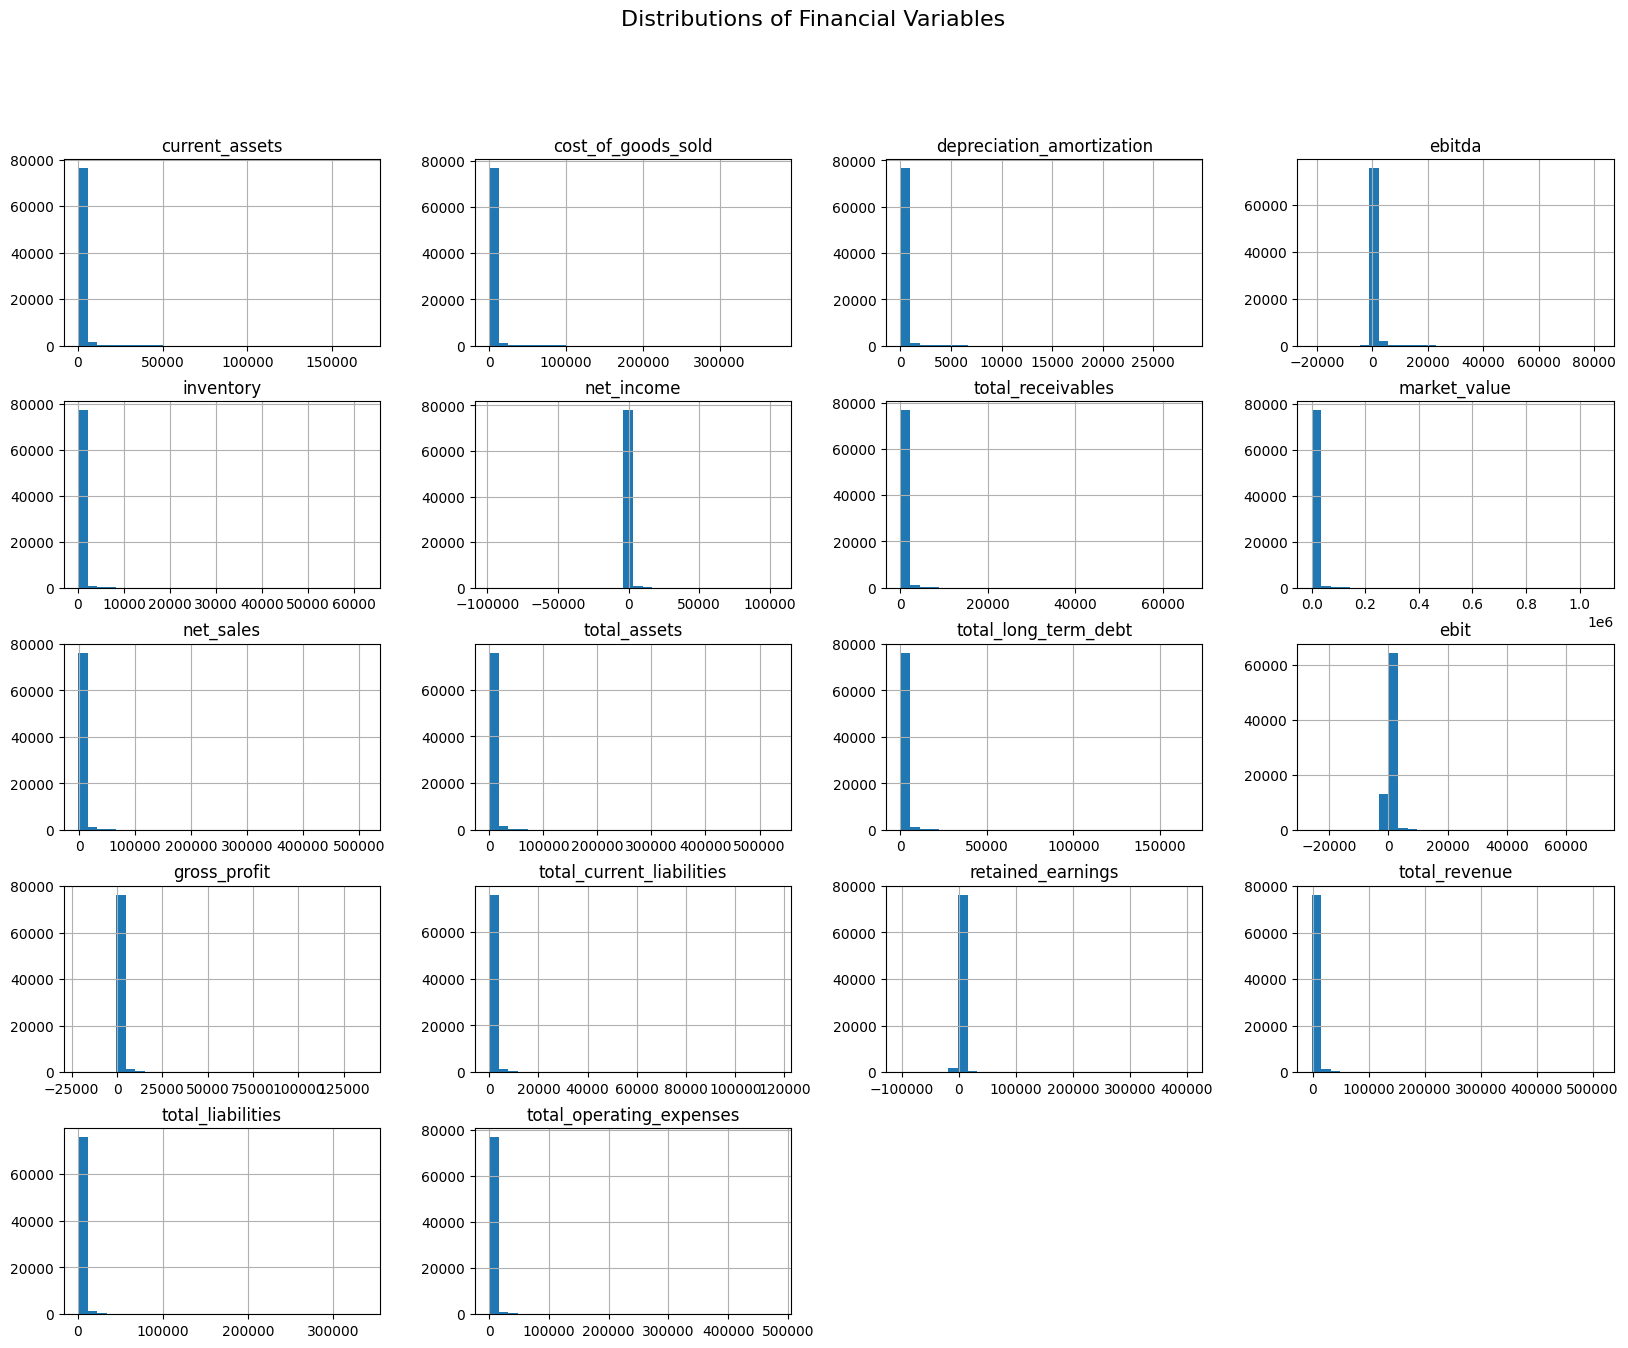

In [11]:
# Visualizing individual distributions

# Selecting only the financial cols
financial_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Plot histograms for all financial variables
df[financial_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle('Distributions of Financial Variables', fontsize=16)
plt.show()

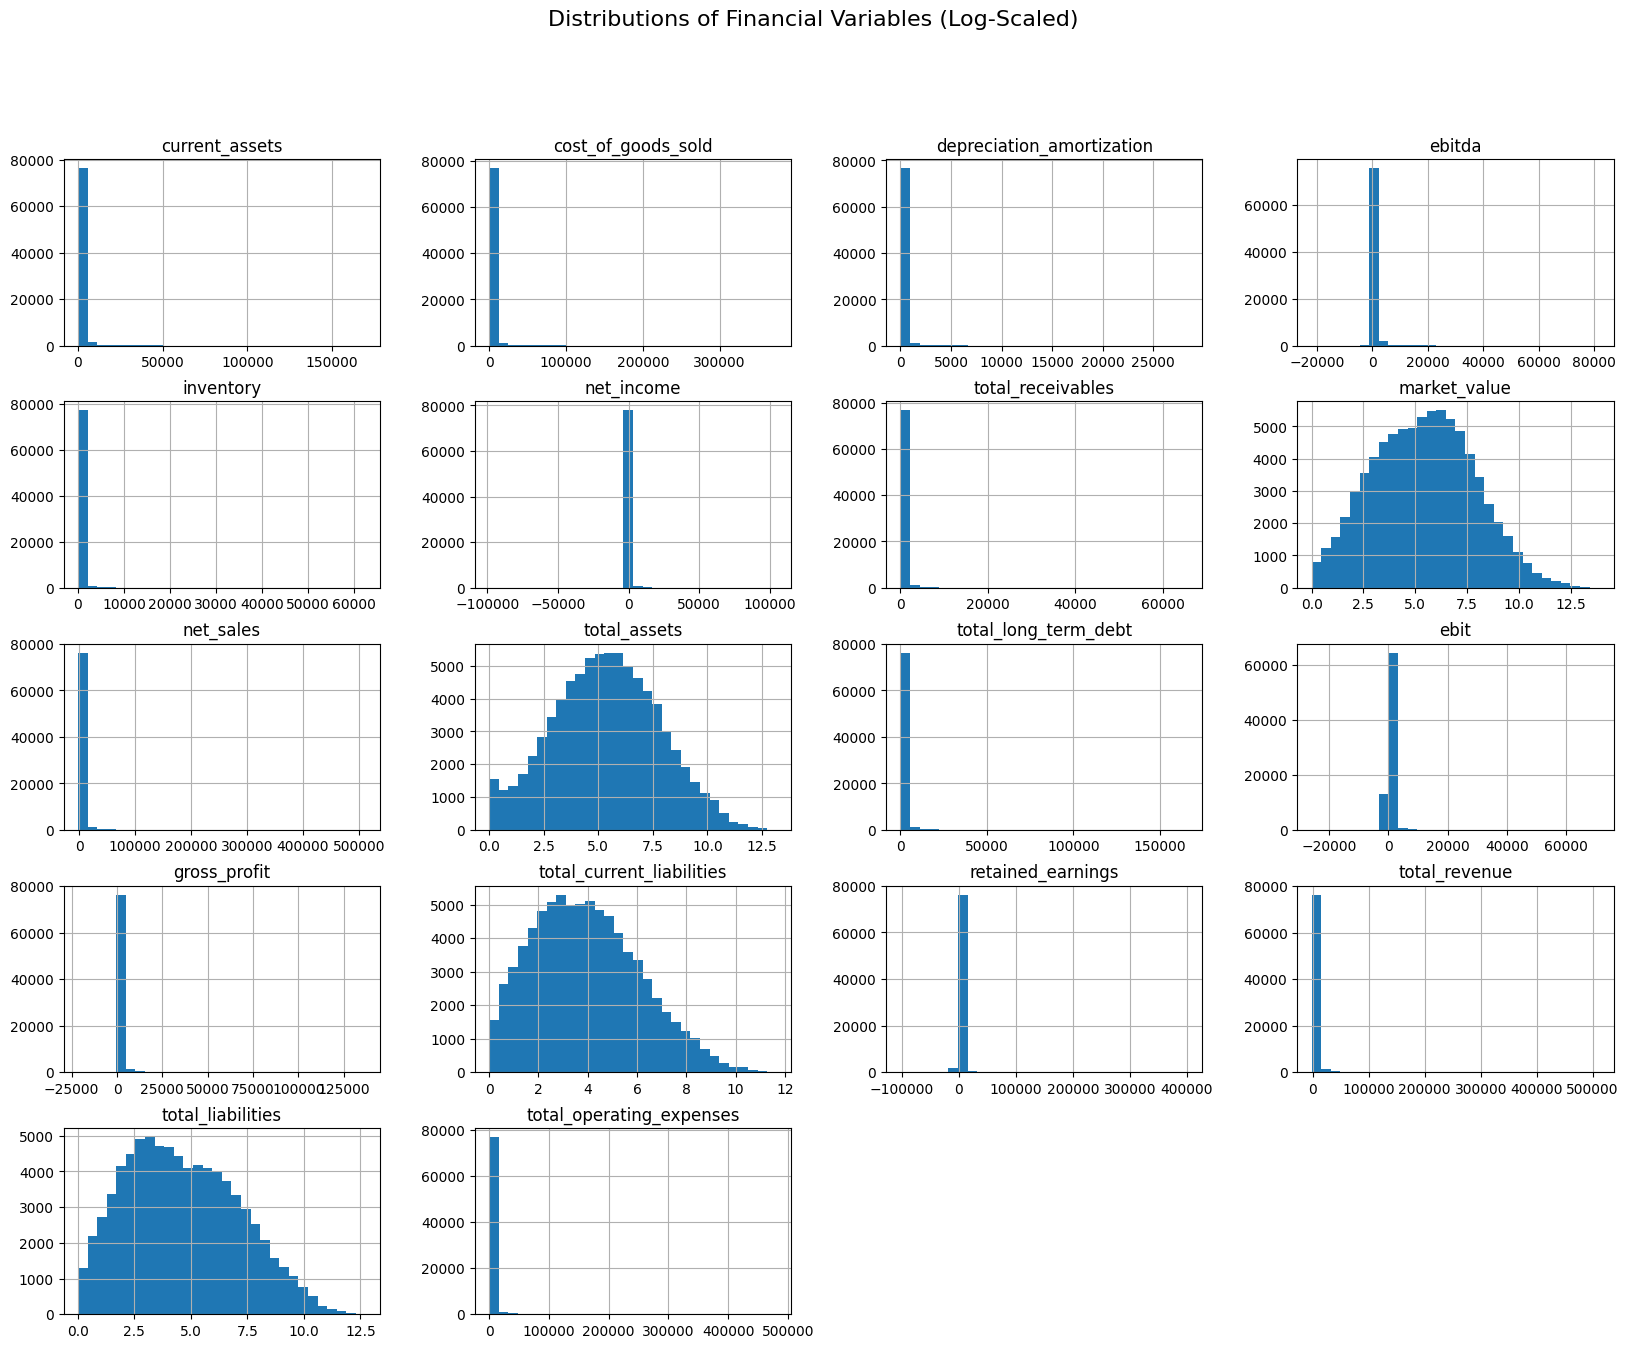

In [14]:
# Let's log-transform positive variables to see if we can uncover any hidden structure

# Identify which columns are strictly positive
positive_cols = [col for col in financial_cols if (df[col] > 0).all()]

# Create a copy for visualization (log-transform positive columns)
df_log = df.copy()
df_log[positive_cols] = np.log1p(df_log[positive_cols])  # log1p handles zeros safely

# Plot histograms of the transformed data
df_log[financial_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle('Distributions of Financial Variables (Log-Scaled)', fontsize=16)
plt.show()

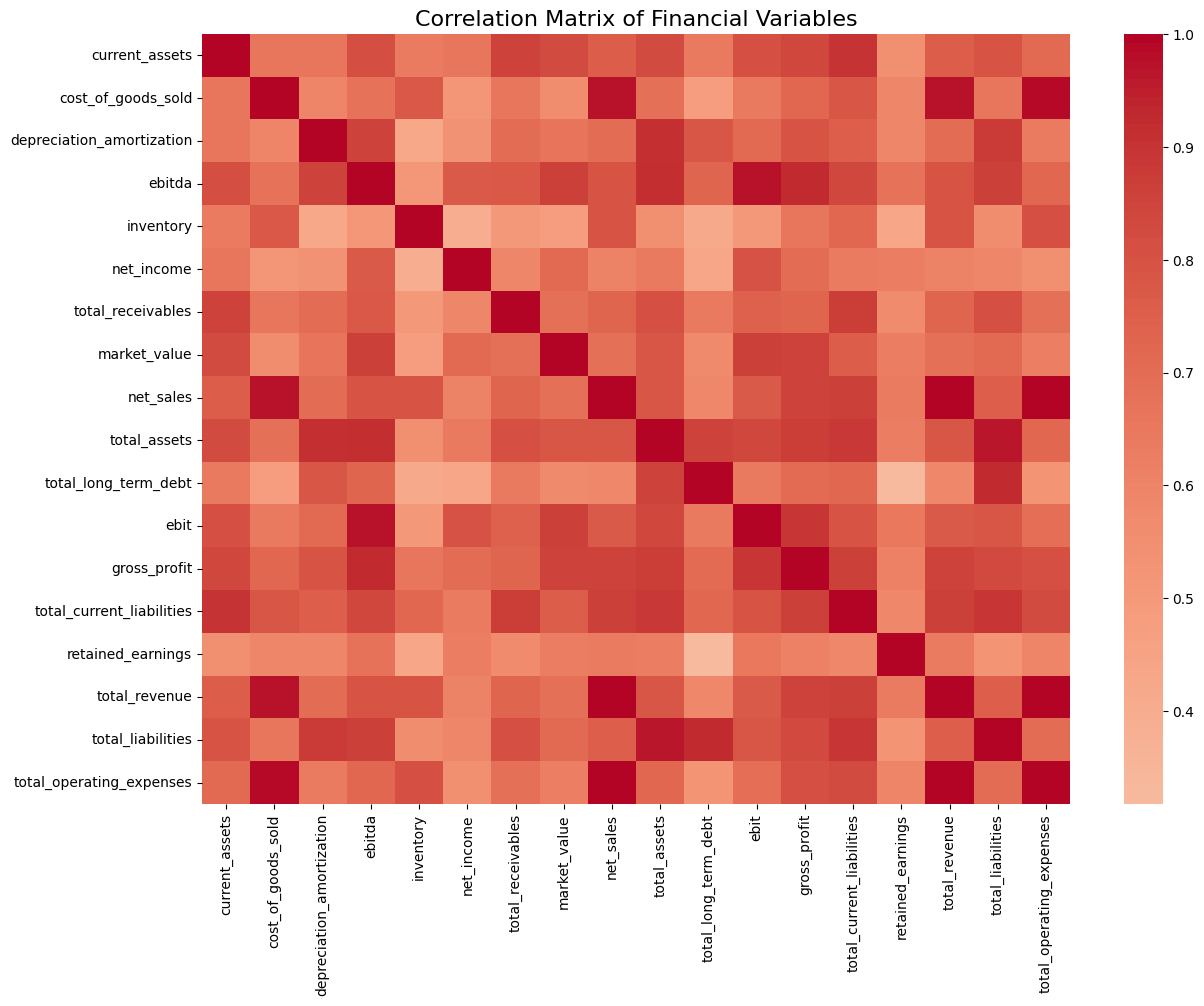

In [12]:
# Examining relationships among the variables using a correlation matrix

plt.figure(figsize=(14, 10))
corr = df[financial_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Financial Variables', fontsize=16)
plt.show()

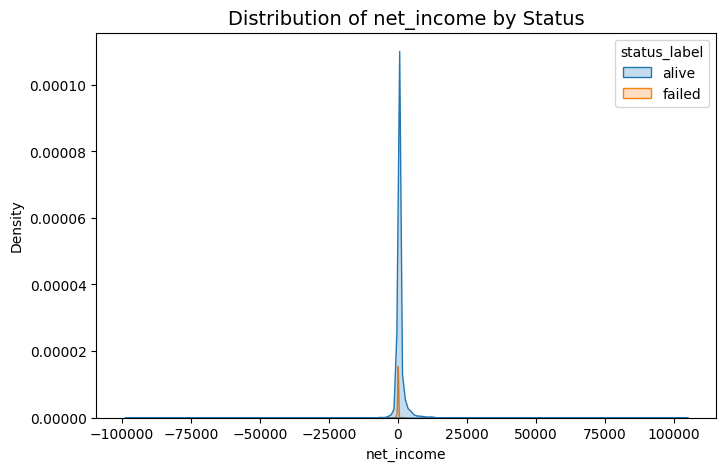

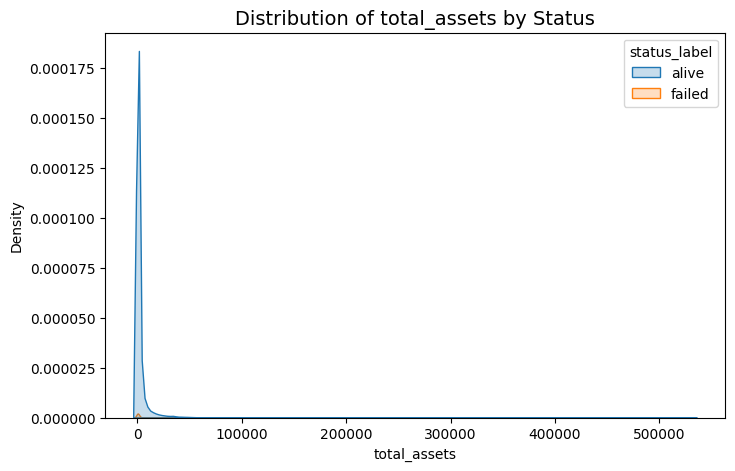

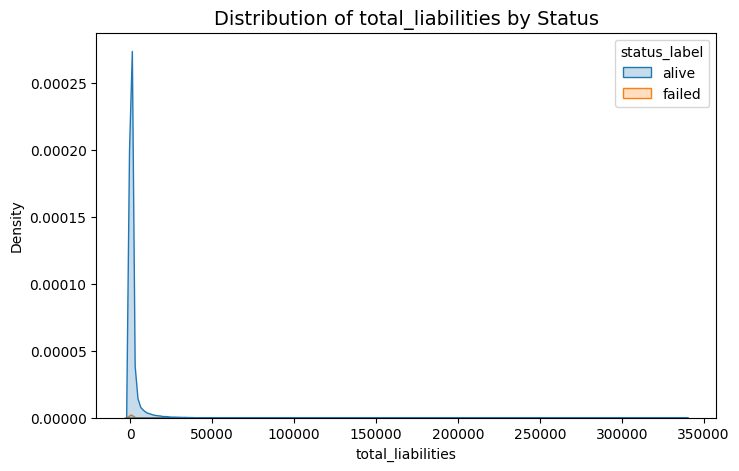

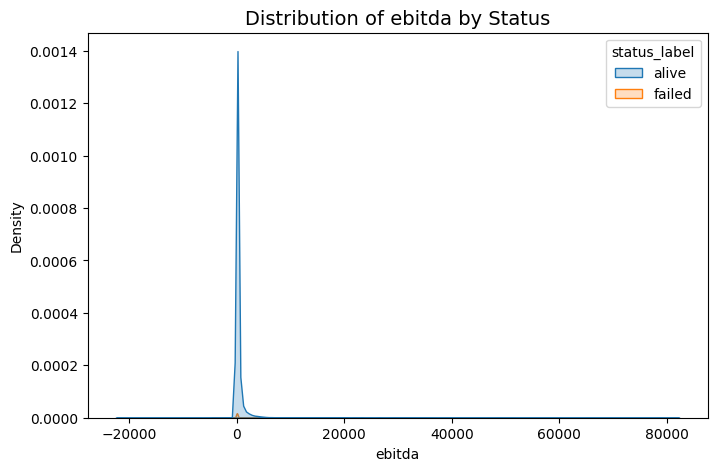

In [13]:
# Examining relationships with the target variable

# Let's compare distributions of a few important variables
key_vars = ['net_income', 'total_assets', 'total_liabilities', 'ebitda']

for var in key_vars:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=var, hue='status_label', fill=True)
    plt.title(f'Distribution of {var} by Status', fontsize=14)
    plt.show()

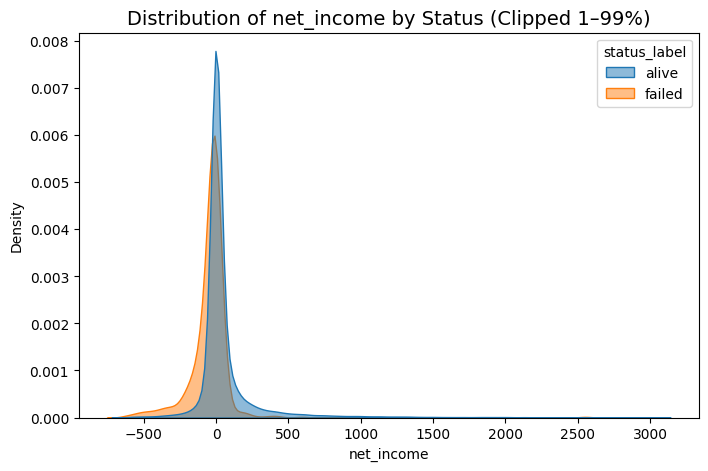

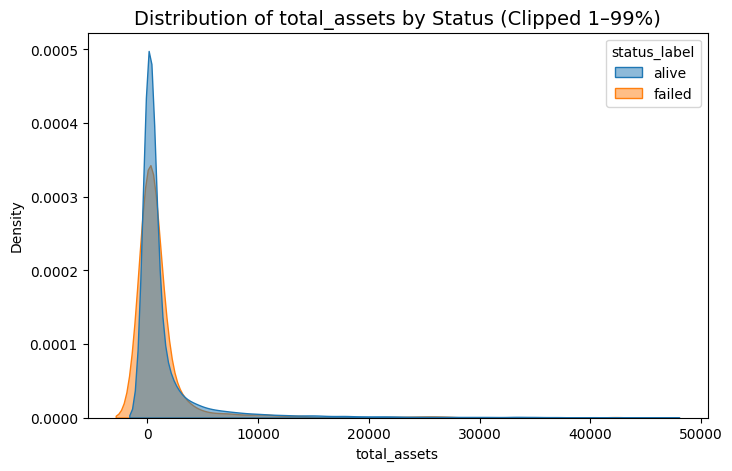

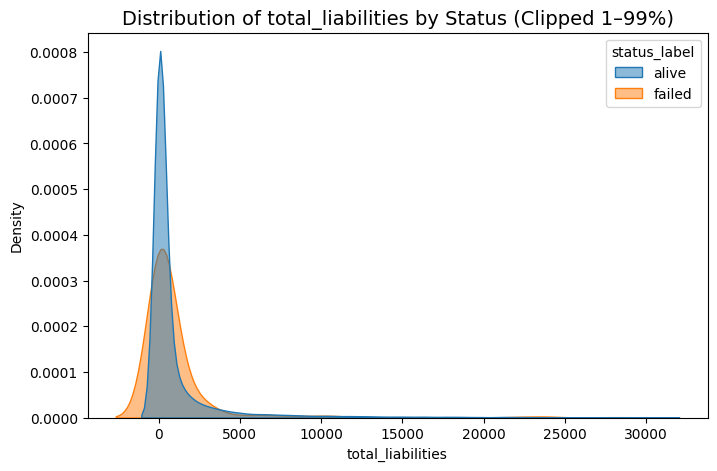

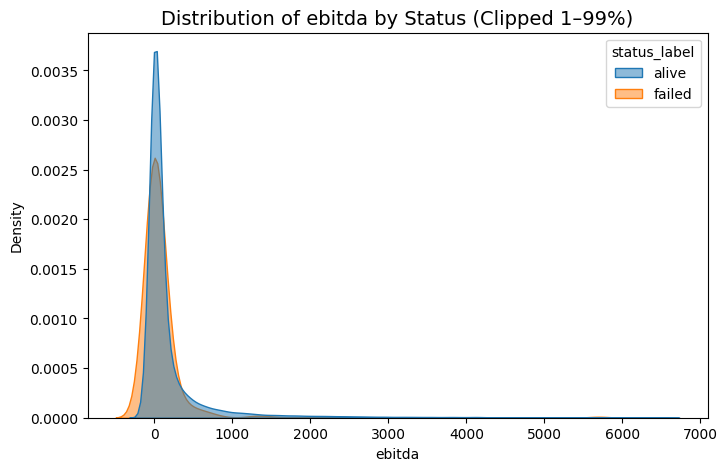

In [16]:
# Our KDE plots are suffering from the same problem as the histograms, as to be expected. Let's see if we can make them a little more enlightening by removing the 
# extreme tails.

for var in key_vars:
    plt.figure(figsize=(8, 5))
    # Limit to central 99% range to remove extreme tails
    low, high = df[var].quantile(0.01), df[var].quantile(0.99)
    sns.kdeplot(
        data=df[(df[var] >= low) & (df[var] <= high)],
        x=var, hue='status_label', fill=True, common_norm=False, alpha=0.5
    )
    plt.title(f'Distribution of {var} by Status (Clipped 1–99%)', fontsize=14)
    plt.show()

In [17]:
# Let's formally identify highly skewed variables in the dataset so that we can decide on how to deal with them.

# Computing skewness for each variable
skewness = df[financial_cols].skew().sort_values(ascending=False)
print("Skewness of financial variables:\n")
print(skewness)

Skewness of financial variables:

retained_earnings            29.607949
inventory                    22.568626
total_operating_expenses     20.384520
cost_of_goods_sold           20.052194
total_revenue                18.987110
net_sales                    18.987110
market_value                 18.194283
ebit                         17.968030
depreciation_amortization    17.860473
ebitda                       16.403531
total_receivables            15.844958
gross_profit                 15.295829
total_long_term_debt         14.848021
current_assets               14.843279
total_current_liabilities    14.225186
total_liabilities            13.767802
total_assets                 13.562208
net_income                   11.866809
dtype: float64


In [ ]:
# Alright so it looks like every single variable in the dataset is very highly skewed so we'll need to transform and standardize them all. Since some variables
# contain negatives and zeros, I think I'll just go with a Leo-Johnson transformation. It's quick, simple and automatically handles negatives and zeros.

from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler

df_transformed = df.copy()

# Applying the Yeo-Johnson power transformation
pt = PowerTransformer(method='yeo-johnson', standardize=False) # standardize=False, we'll use RobustScaler() after
df_transformed[financial_cols] = pt.fit_transform(df_transformed[financial_cols])

# Standardize afterwards with RobustScaler for the logistic regression we plan to build
scaler = RobustScaler()
df_transformed[financial_cols] = scaler.fit_transform(df_transformed[financial_cols])

In [24]:
# Now to check that it worked correctly. First, numerically

# Recalculating skewness after transformation
new_skew = pd.Series(df_transformed[financial_cols].skew(), index=financial_cols).sort_values(ascending=False)

# Comparing before and after
comparison = pd.DataFrame({
    'original_skew': skewness,
    'new_skew': new_skew
}).sort_values(by='original_skew', ascending=False)

print(comparison)

                           original_skew   new_skew
retained_earnings              29.607949  -0.815441
inventory                      22.568626   0.174850
total_operating_expenses       20.384520 -27.052749
cost_of_goods_sold             20.052194 -32.832735
total_revenue                  18.987110 -25.970507
net_sales                      18.987110 -25.970507
market_value                   18.194283   0.007643
ebit                           17.968030 -15.018750
depreciation_amortization      17.860473   0.128494
ebitda                         16.403531 -24.064903
total_receivables              15.844958   0.047689
gross_profit                   15.295829 -20.371813
total_long_term_debt           14.848021   0.210777
current_assets                 14.843279  -0.064558
total_current_liabilities      14.225186   0.041339
total_liabilities              13.767802   0.040843
total_assets                   13.562208   0.002311
net_income                     11.866809 -20.371035


In [ ]:
# Okay so we still have some problem variables in there. Let's see if we can find the skew before the RobustScaler() was applied, maybe that was the problem

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_yeo = df.copy()
df_yeo[financial_cols] = pt.fit_transform(df[financial_cols])

# Check skew before scaling
skew_after_yeo = df_yeo[financial_cols].skew().sort_values(ascending=False)
print(skew_after_yeo)

total_long_term_debt          0.210777
inventory                     0.174850
depreciation_amortization     0.128494
total_receivables             0.047689
total_current_liabilities     0.041339
total_liabilities             0.040843
market_value                  0.007643
total_assets                  0.002311
current_assets               -0.064558
retained_earnings            -0.815441
ebit                        -15.018750
net_income                  -20.371035
gross_profit                -20.371813
ebitda                      -24.064903
total_revenue               -25.970507
net_sales                   -25.970507
total_operating_expenses    -27.052749
cost_of_goods_sold          -32.832735
dtype: float64


In [ ]:
# The variables were very skewed even before the RobustScaler() was applied. Making a custom log transformation

very_skewed = skew_after_yeo[abs(skew_after_yeo) > 2].index.tolist()
print("Still problematic after Yeo-Johnson:", very_skewed)

# Making a simple custom log transformation for those problem variables
df_yeo[very_skewed] = np.log1p(df[very_skewed].abs() + 1)

Still problematic after Yeo-Johnson: ['ebit', 'net_income', 'gross_profit', 'ebitda', 'total_revenue', 'net_sales', 'total_operating_expenses', 'cost_of_goods_sold']


In [ ]:
# Compute new skewness values
new_skew = df_yeo[financial_cols].skew().sort_values(ascending=False)

print("Skewness after Yeo–Johnson (and manual fixes if any):\n")
print(new_skew)

# Quick summary statistics
print("\nAverage absolute skewness:", abs(new_skew).mean().round(3))
print("Number of features now roughly symmetric (|skew| < 0.5):", (abs(new_skew) < 0.5).sum())
print("Number of features still moderately skewed (0.5 ≤ |skew| < 2):", ((abs(new_skew) >= 0.5) & (abs(new_skew) < 2)).sum())
print("Number of features still highly skewed (|skew| ≥ 2):", (abs(new_skew) >= 2).sum())

Skewness after Yeo–Johnson (and manual fixes if any):

net_income                   0.741183
ebit                         0.684601
ebitda                       0.599726
gross_profit                 0.274525
cost_of_goods_sold           0.227982
total_long_term_debt         0.210777
total_operating_expenses     0.206907
inventory                    0.174850
depreciation_amortization    0.128494
total_revenue                0.047763
net_sales                    0.047763
total_receivables            0.047689
total_current_liabilities    0.041339
total_liabilities            0.040843
market_value                 0.007643
total_assets                 0.002311
current_assets              -0.064558
retained_earnings           -0.815441
dtype: float64

Average absolute skewness: 0.242
Number of features now roughly symmetric (|skew| < 0.5): 14
Number of features still moderately skewed (0.5 ≤ |skew| < 2): 4
Number of features still highly skewed (|skew| ≥ 2): 0


In [29]:
# Okay now that the skew has been fixed, let's apply StandardScaler() again to get a final df

scaler = StandardScaler()
df_final = df_yeo.copy()
df_final[financial_cols] = scaler.fit_transform(df_final[financial_cols])

In [31]:
# After encoding the target variable status_label, we will be ready to split the data into the training, validation and test sets.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final = df_final.copy()  # safe copy
df_final['status_label_encoded'] = le.fit_transform(df_final['status_label'])

# Confirming mapping executed correctly
print("Label classes (in order of encoded values):", le.classes_)

Label classes (in order of encoded values): ['alive' 'failed']


In [32]:
# Great, let's now make our time-based splits.

train_df = df_final[df_final['year'] <= 2011]
val_df   = df_final[(df_final['year'] >= 2012) & (df_final['year'] <= 2014)]
test_df  = df_final[df_final['year'] >= 2015]

# Making sure it worked correctly
print("Train year range:", train_df['year'].min(), "to", train_df['year'].max())
print("Val year range:",   val_df['year'].min(),   "to", val_df['year'].max())
print("Test year range:",  test_df['year'].min(),  "to", test_df['year'].max())

Train year range: 1999 to 2011
Val year range: 2012 to 2014
Test year range: 2015 to 2018


In [33]:
# Finally, to build our X/y for each split. We should be ready to move on to model-building after this step.

X_train = train_df[financial_cols].copy()
y_train = train_df['status_label_encoded'].copy()

X_val   = val_df[financial_cols].copy()
y_val   = val_df['status_label_encoded'].copy()

X_test  = test_df[financial_cols].copy()
y_test  = test_df['status_label_encoded'].copy()

In [34]:
# Final shape checks
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_val   shape:", X_val.shape,   "| y_val   shape:", y_val.shape)
print("X_test  shape:", X_test.shape,  "| y_test  shape:", y_test.shape)

# (Optional) class balance check in each split
print("\nClass balance by split:")
print("Train:\n", y_train.value_counts(normalize=True))
print("Val:\n",   y_val.value_counts(normalize=True))
print("Test:\n",  y_test.value_counts(normalize=True))

X_train shape: (55927, 18) | y_train shape: (55927,)
X_val   shape: (10473, 18) | y_val   shape: (10473,)
X_test  shape: (12282, 18) | y_test  shape: (12282,)

Class balance by split:
Train:
 status_label_encoded
0    0.992794
1    0.007206
Name: proportion, dtype: float64
Val:
 status_label_encoded
0    0.991693
1    0.008307
Name: proportion, dtype: float64
Test:
 status_label_encoded
0    0.990311
1    0.009689
Name: proportion, dtype: float64


In [ ]:
# Forgot to account for multicollinearity before making our splits. But that's alright, we can still that step now. Let's first check highly correlated variables again.
 
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
high_corr = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features (> 0.9):", high_corr)

Highly correlated features (> 0.9): ['net_sales', 'total_assets', 'ebit', 'gross_profit', 'total_current_liabilities', 'total_revenue', 'total_liabilities', 'total_operating_expenses']


In [36]:
# Dropping redundant variables. This will help make our logistic regression coefficients more interpretable, a key goal of this project.

to_drop = [
    'net_sales',
    'ebit',
    'gross_profit',
    'total_current_liabilities',
    'total_revenue',
    'total_operating_expenses',
    'total_liabilities'
]

X_train_reduced = X_train.drop(columns=to_drop)
X_val_reduced   = X_val.drop(columns=to_drop)
X_test_reduced  = X_test.drop(columns=to_drop)

print("Reduced feature count:", len(X_train_reduced.columns))

Reduced feature count: 11


_________________________________MODEL-BUILDING_____________________________________________

In [37]:
# First, let's build the baseline logistic regression.

# Importing what we will need for sklearn to build and evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support
)

In [38]:
log_reg = LogisticRegression(
    class_weight='balanced',    # handles the severe class imbalance
    max_iter=1000,              # max_iter increased so it converges
    solver='lbfgs',             # works well for L2-regularized logistic regression
    n_jobs=-1
)

log_reg.fit(X_train_reduced, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
# Predicted probabilities for the positive class (failed = 1)
y_val_proba = log_reg.predict_proba(X_val_reduced)[:, 1]

# Default 0.5 threshold predictions
y_val_pred = (y_val_proba >= 0.5).astype(int)

# Let's evaluate the model here and tune the hyperparameters before moving on to predicting on the test set
print("Validation ROC AUC:", roc_auc_score(y_val, y_val_proba))

print("\nValidation classification report (threshold=0.5):")
print(classification_report(y_val, y_val_pred, digits=4))

print("Validation confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_val, y_val_pred))

# Optional: look at precision/recall specifically for the "failed" class (1)
prec, rec, f1, support = precision_recall_fscore_support(y_val, y_val_pred, labels=[1])
print("\nFailed class performance on validation (label=1):")
print(f"precision={prec[0]:.4f}, recall={rec[0]:.4f}, f1={f1[0]:.4f}, support={support[0]}")

Validation ROC AUC: 0.8830200247459554

Validation classification report (threshold=0.5):
              precision    recall  f1-score   support

           0     0.9976    0.8300    0.9061     10386
           1     0.0360    0.7586    0.0688        87

    accuracy                         0.8294     10473
   macro avg     0.5168    0.7943    0.4874     10473
weighted avg     0.9896    0.8294    0.8991     10473

Validation confusion matrix (rows=true, cols=pred):
[[8620 1766]
 [  21   66]]

Failed class performance on validation (label=1):
precision=0.0360, recall=0.7586, f1=0.0688, support=87


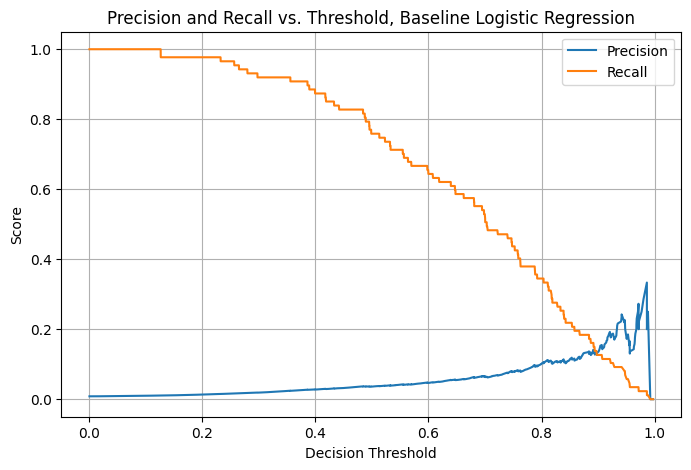

In [41]:
# So as expected, the baseline 0.5 decision threshold is too low, giving us way too many false positives. Let's find a better decision threshold before moving on
# to predicting on the test set

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold, Baseline Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Let's find the threshold that maximizes F1 and use that going forward

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_index = np.argmax(f1_scores)
best_thresh = thresholds[best_index]

print(f"Best threshold for maximum F1: {best_thresh:.3f}")
print(f"Precision: {precisions[best_index]:.3f}, Recall: {recalls[best_index]:.3f}, F1: {f1_scores[best_index]:.3f}")

Best threshold for maximum F1: 0.811
Precision: 0.112, Recall: 0.333, F1: 0.168


In [43]:
# Adjusting our threshold and evaluating again

y_val_pred_adj = (y_val_proba >= best_thresh).astype(int)

print(classification_report(y_val, y_val_pred_adj, digits=4))
print(confusion_matrix(y_val, y_val_pred_adj))


              precision    recall  f1-score   support

           0     0.9943    0.9779    0.9860     10386
           1     0.1120    0.3333    0.1676        87

    accuracy                         0.9725     10473
   macro avg     0.5531    0.6556    0.5768     10473
weighted avg     0.9870    0.9725    0.9792     10473

[[10156   230]
 [   58    29]]


In [47]:
# Let's now get predicted probabilities on the test set using our optimal threshold.

y_test_proba = log_reg.predict_proba(X_test_reduced)[:, 1]

# Applying best threshold 
best_thresh = 0.811
y_test_pred = (y_test_proba >= best_thresh).astype(int)

# Evaluating some key metrics
print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}\n")

print(f"Classification report (threshold={best_thresh}):")
print(classification_report(y_test, y_test_pred, digits=4))

print("Confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_test, y_test_pred))

Test ROC AUC: 0.8814

Classification report (threshold=0.811):
              precision    recall  f1-score   support

           0     0.9950    0.9736    0.9842     12163
           1     0.1553    0.4958    0.2365       119

    accuracy                         0.9690     12282
   macro avg     0.5751    0.7347    0.6103     12282
weighted avg     0.9868    0.9690    0.9769     12282

Confusion matrix (rows=true, cols=pred):
[[11842   321]
 [   60    59]]


In [45]:
# Fairly decent baseline model! Let's examine the feature coefficients to help us make sense of what the model is doing

coef_df = pd.DataFrame({
    'feature': X_train_reduced.columns,
    'coefficient': log_reg.coef_[0]
}).sort_values(by='coefficient', ascending=False)

print("\nLogistic Regression Coefficients (sorted by impact on failure odds):")
print(coef_df)


Logistic Regression Coefficients (sorted by impact on failure odds):
                      feature  coefficient
8                total_assets     1.355869
5                  net_income     0.963290
1          cost_of_goods_sold     0.841240
4                   inventory     0.429491
9        total_long_term_debt     0.120913
3                      ebitda     0.070148
10          retained_earnings    -0.147463
2   depreciation_amortization    -0.246599
6           total_receivables    -0.569164
0              current_assets    -1.269854
7                market_value    -2.023714


In [48]:
# Now for the XGBoost model:

from xgboost import XGBClassifier

# Let's first calculate the class imbalance weight that we will use for the XGBoost. *Done on the train set only*
num_alive = (y_train == 0).sum()
num_failed = (y_train == 1).sum()
scale_pos_weight = num_alive / num_failed
print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 137.77667493796525


In [49]:
# Defining and training the XGBoost
# Keeping model fairly small/regularized to avoid overfitting.
# eval_metric='logloss', standard for binary classification.

xgb_model = XGBClassifier(
    n_estimators=300,          # number of trees
    max_depth=4,              # tree depth (controls complexity)
    learning_rate=0.05,       # shrinkage / step size
    subsample=0.8,            # row sampling for each tree
    colsample_bytree=0.8,     # feature sampling for each tree
    min_child_weight=5,       # additional regularization
    reg_lambda=1.0,           # L2 regularization
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=18,
    n_jobs=-1
)

xgb_model.fit(X_train_reduced, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [50]:
# Evaluating on the validation set, first with default 0.5 threshold

y_val_proba_xgb = xgb_model.predict_proba(X_val_reduced)[:, 1]

# Threshold = 0.5
y_val_pred_05 = (y_val_proba_xgb >= 0.5).astype(int)

print("\n=== XGBoost @ threshold = 0.5 ===")
print("Validation ROC AUC:", roc_auc_score(y_val, y_val_proba_xgb))
print("\nValidation classification report:")
print(classification_report(y_val, y_val_pred_05, digits=4))
print("Validation confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_val, y_val_pred_05))


=== XGBoost @ threshold = 0.5 ===
Validation ROC AUC: 0.906742276849251

Validation classification report:
              precision    recall  f1-score   support

           0     0.9970    0.9270    0.9607     10386
           1     0.0711    0.6667    0.1285        87

    accuracy                         0.9249     10473
   macro avg     0.5340    0.7968    0.5446     10473
weighted avg     0.9893    0.9249    0.9538     10473

Validation confusion matrix (rows=true, cols=pred):
[[9628  758]
 [  29   58]]


In [51]:
# Picking a threshold that balances precision/recall for the failed class
# Exactly what we did for logistic regression, pciking threshold that maximizes F1

precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba_xgb)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = np.argmax(f1_scores)
best_thresh_xgb = thresholds[best_idx]

print(f"\nBest validation threshold for XGBoost by F1: {best_thresh_xgb:.3f}")
print(f"Precision at best threshold: {precisions[best_idx]:.3f}")
print(f"Recall at best threshold:    {recalls[best_idx]:.3f}")
print(f"F1 at best threshold:        {f1_scores[best_idx]:.3f}")


Best validation threshold for XGBoost by F1: 0.780
Precision at best threshold: 0.144
Recall at best threshold:    0.287
F1 at best threshold:        0.192


In [52]:
# Re-evaluating using that best threshold

y_val_pred_best = (y_val_proba_xgb >= best_thresh_xgb).astype(int)

print(f"\n=== XGBoost @ threshold = {best_thresh_xgb:.3f} ===")
print("Validation classification report:")
print(classification_report(y_val, y_val_pred_best, digits=4))
print("Validation confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_val, y_val_pred_best))


=== XGBoost @ threshold = 0.780 ===
Validation classification report:
              precision    recall  f1-score   support

           0     0.9940    0.9857    0.9898     10386
           1     0.1437    0.2874    0.1916        87

    accuracy                         0.9799     10473
   macro avg     0.5688    0.6365    0.5907     10473
weighted avg     0.9869    0.9799    0.9832     10473

Validation confusion matrix (rows=true, cols=pred):
[[10237   149]
 [   62    25]]


In [53]:
# Feature importance (which signals matter most)

importances = xgb_model.feature_importances_
feat_importance_df = pd.DataFrame({
    'feature': X_train_reduced.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nTop feature importances from XGBoost:")
print(feat_importance_df.head(15))


Top feature importances from XGBoost:
                      feature  importance
7                market_value    0.159592
10          retained_earnings    0.119139
1          cost_of_goods_sold    0.095221
5                  net_income    0.092695
4                   inventory    0.082184
0              current_assets    0.081825
8                total_assets    0.081350
6           total_receivables    0.074995
2   depreciation_amortization    0.072167
9        total_long_term_debt    0.070441
3                      ebitda    0.070391


In [54]:
# Beautiful, now to test the model on the test set:

# Getting predicted probabilities for the test set
y_test_proba_xgb = xgb_model.predict_proba(X_test_reduced)[:, 1]

# Using the best validation threshold
best_thresh_xgb = 0.780

y_test_pred_best = (y_test_proba_xgb >= best_thresh_xgb).astype(int)

# Evaluating on the test set
print(f"Test ROC AUC (XGBoost): {roc_auc_score(y_test, y_test_proba_xgb):.4f}\n")

print(f"XGBoost Test classification report (threshold={best_thresh_xgb}):")
print(classification_report(y_test, y_test_pred_best, digits=4))

print("XGBoost Test confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_test, y_test_pred_best))

Test ROC AUC (XGBoost): 0.8700

XGBoost Test classification report (threshold=0.78):
              precision    recall  f1-score   support

           0     0.9928    0.9796    0.9862     12163
           1     0.1174    0.2773    0.1650       119

    accuracy                         0.9728     12282
   macro avg     0.5551    0.6285    0.5756     12282
weighted avg     0.9844    0.9728    0.9782     12282

XGBoost Test confusion matrix (rows=true, cols=pred):
[[11915   248]
 [   86    33]]


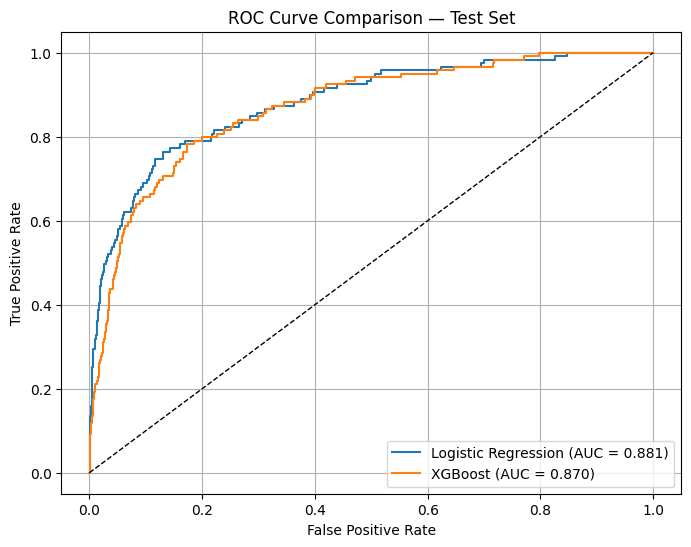

In [55]:
# 1. Compute and plot ROC curves for both models

from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_proba)           # Logistic Regression
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)     # XGBoost

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison — Test Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

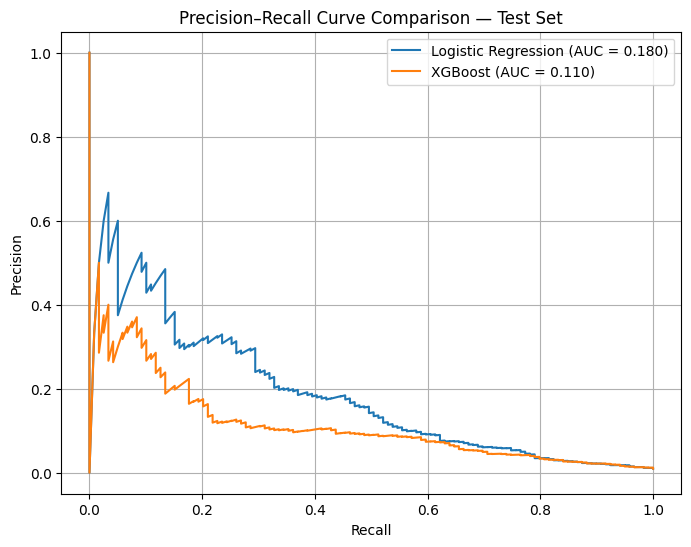

In [56]:
# Computing and plotting precision–recall curves for both models

prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_test_proba)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_test_proba_xgb)

pr_auc_lr = auc(rec_lr, prec_lr)
pr_auc_xgb = auc(rec_xgb, prec_xgb)

plt.figure(figsize=(8, 6))
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AUC = {pr_auc_lr:.3f})")
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AUC = {pr_auc_xgb:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison — Test Set")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()